# Sklearn course 10 : Unsupervised problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Create Data

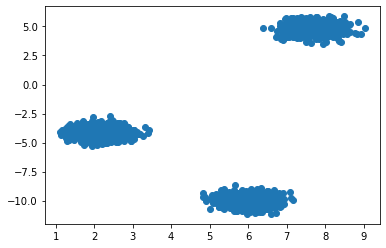

In [4]:
from sklearn.datasets import make_blobs

features, clusters = make_blobs(n_samples = 2000,
                  n_features = 2, 
                  centers = 3,
                  cluster_std = 0.4,
                  shuffle = True)

plt.scatter(features[:,0], features[:,1]) # all row, colomn 0 or 1

In [5]:
X = features
y = clusters
X

array([[  7.72283651,   4.8048964 ],
       [  5.56905893, -10.56855598],
       [  7.50420809,   4.61665287],
       ...,
       [  6.26326677, -10.34150817],
       [  5.52964445, -10.39400187],
       [  6.02807992, -10.20762695]])

## Clustering

**K-Means Clustering**

<img src="images/clustering.jpg" style="width: 400px;"/>

How it work ? <br>

iterative :<br>
First -> create `n` points and place them randomly,
1. assigns the points to the nearest center,
2. move the center to the cluster mean

-652.0085339592033

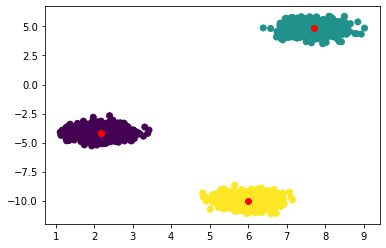

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)
center = model.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(center[:,0], center[:,1], c="r")
model.score(X)

**How to know the number of cluster ?**

Text(0, 0.5, 'inertia')

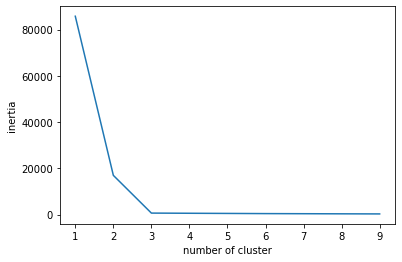

In [7]:
inertia = []
K_range = range(1,10)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel("number of cluster")
plt.ylabel("inertia")

**NOTE : for non-convex (1) or anisotrope (2) cluster : use Agglomerative Clustering (1) or DBSCAN (2)**

## Anomaly Detection (isolation forest)

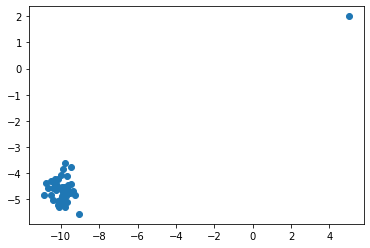

In [8]:
X, y = make_blobs(n_samples=50, 
                 centers=1,
                 cluster_std=0.4)
X[-1,:] = np.array([5,2])

plt.scatter(X[:,0],X[:,1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

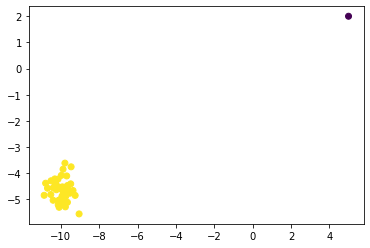

In [9]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01) # 0.01=1% meaning : we think they is 1% of anomaly in our data
model.fit(X)
anomaly = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=anomaly)
anomaly

## Application

1

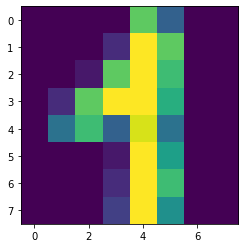

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data 
y = digits.target

plt.imshow(images[42])
y[42]

In [11]:
model = IsolationForest(contamination=0.01)
model.fit(X)
outliers = (model.predict(X) == -1)
outliers

array([False, False, False, ..., False, False, False])

5

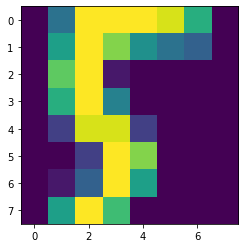

In [12]:
anomaly = images[outliers]
i = 0
plt.imshow(anomaly[i])
y[outliers][i]

## Principal composant analyse (PAC : dimension reduction)

**We want to keep 99-95% of our data variance**

<font color=red style="font-size: x-large">
    Always use `StandardScaler` (or equivalent) befor using `PCA`<br>
    Dont use it after encoding using `OneHotEncoder` (can work but no great)<br>
    Dont work with non linear features -> use Manifold Learning (`IsoMap`or `T-SNE`)
</font>

In [13]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

except for ploting (`n_components` = 2 or 3) we want `n_components` that keep 99-95% of our data variance

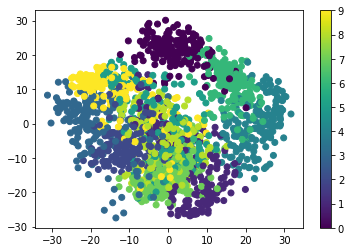

In [14]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

In [15]:
X.shape

(1797, 64)

First method:

In [16]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)
V_ratio = model.explained_variance_ratio_
V_ratio # percentage of preserved variance for each components

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [17]:
np.cumsum(V_ratio)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

**For exemple We want 95%** 

In [18]:
persent_95 = np.argmax( np.cumsum(V_ratio)>0.95 )
persent_95

28

Text(0, 0.5, 'variance')

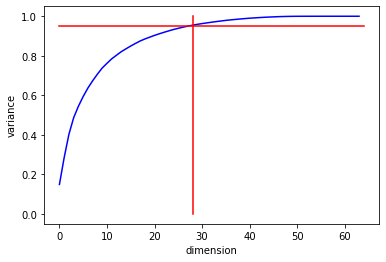

In [19]:
plt.plot(np.cumsum(V_ratio), c="blue")
plt.plot([0,64], [0.95,0.95], c="red")
plt.plot([persent_95,persent_95], [0, 1], c="red")

plt.xlabel("dimension")
plt.ylabel("variance")

In [20]:
print(f"n_components has to be {persent_95} to keep 95% information of our dataset")

n_components has to be 28 to keep 95% information of our dataset


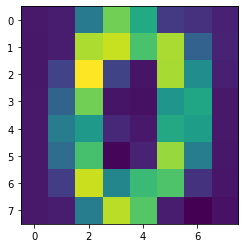

In [21]:
model = PCA(n_components=persent_95)
X_reduced = model.fit_transform(X)

X_recovered = model.inverse_transform(X_reduced) # WARNING 5% of the data information have been lost
plt.imshow(X_recovered[0].reshape(8,8)) 
# 8 because we have 64 features (dimension=64) and sqrt(64)=8 -> suqared matrix

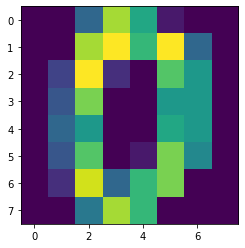

In [22]:
plt.imshow(images[0])

Second methode : we can enter the percentage in n_components :

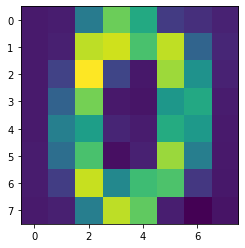

In [23]:
model = PCA(n_components=0.95)
X_reduced = model.fit_transform(X)

X_recovered = model.inverse_transform(X_reduced) # WARNING 5% of the data information have been lost
plt.imshow(X_recovered[0].reshape(8,8))